# Clustering

## Change in Mobility during COVID19 Pandemy

## 1. Introduction

This study is conducted to investigate the change in mobility behaviour during pandemy. In the scope of this study, Mobility Report published by Google is utilized. To be able to understand the reasons behind the change in mobility, various data from multiple sources are collected.

Creating dataframes and data cleaning process is explained here: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/mobility-dataframe-preparation.ipynb

This data is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb

Some statistical tests were conducted to prepare the relationship between the mobility changes and weather (precipitation), city and county development index: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/statistical-analysis/mobility-statistical-tests.ipynb

In this work, a clustering process is done to examine if a meaningful pattern between the groups of countries clustered by their mobility behaviour.

## 2. Importing Libraries & Data

First, the libraries are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import urllib.request as urllib
import re
import matplotlib.dates as mdates

We import the dataframe that is prepared in the following work: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/mobility-dataframe-preparation.ipynb

In [2]:
df = pd.read_csv("../Traffic Studies/final_df.csv", low_memory=False)

In [3]:
df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,...,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],rain,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
0,0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430715 entries, 0 to 10430714
Data columns (total 36 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Unnamed: 0                                          int64  
 1   country_region_code                                 object 
 2   country_region                                      object 
 3   sub_region_1                                        object 
 4   sub_region_2                                        object 
 5   metro_area                                          object 
 6   iso_3166_2_code                                     object 
 7   census_fips_code                                    float64
 8   place_id                                            object 
 9   date                                                object 
 10  retail_and_recreation_percent_change_from_baseline  float64
 11  grocery_and_pharmacy_percent_change

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df["year"] = df["date"].apply(lambda x: x.year)
df["month"] = df["date"].apply(lambda x: x.month)
df["day"] = df["date"].apply(lambda x: x.day)

In [12]:
mobility_cols = ['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline']

<br><br><br>

## 3. Clustering

In this Section, we try to cluster countries based on their mobility changes. Google provides the mobility changes in six different categories. Using these categories, we can manage to cluster the countries. Then, we can show them on a map colored by their cluster groups and we try to find their common properties.

<br><br>

### 3.1. Data Cleaning

To begin with we should make an appropriate dataframe.

In [58]:
df_bycountry = df.groupby("country_region").mean()[mobility_cols]

In [59]:
df_bycountry

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region,,,,,,
Afghanistan,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810
Angola,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880
Antigua and Barbuda,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855
Argentina,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469
Aruba,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474
...,...,...,...,...,...,...
Venezuela,-7.547344,23.178984,-3.151270,-25.554273,-4.401848,11.019630
Vietnam,-17.715051,-0.131074,-13.024684,-21.629142,-9.456364,-1.952603
Yemen,54.060116,72.262125,72.439952,28.506540,19.899538,2.265589


In [60]:
df_bycountry.isnull().sum()

retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    1
transit_stations_percent_change_from_baseline         1
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              3
dtype: int64

In [61]:
df_bycountry.dropna(axis=0,inplace=True)

In [62]:
df_bycountry.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline,132.0,-5.101199,16.583020,-41.087375,-16.100020,-8.791580,0.905924,59.693382
grocery_and_pharmacy_percent_change_from_baseline,132.0,15.178603,22.070142,-21.852194,1.954099,9.706435,20.457837,100.651521
parks_percent_change_from_baseline,132.0,12.238088,30.670555,-45.326790,-12.538152,10.667382,31.227068,100.857491
transit_stations_percent_change_from_baseline,132.0,-13.022909,18.953696,-47.611017,-26.779628,-16.766521,-3.059908,46.211894
workplaces_percent_change_from_baseline,132.0,-11.604915,11.796983,-33.149731,-20.869389,-14.315261,-4.730334,23.876744
residential_percent_change_from_baseline,132.0,6.083415,4.486592,-3.869515,3.426365,5.638434,8.496928,19.661830


<br><br>

### 3.2. Clustering Process

#### 3.2.1. Data Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_bycountry)

<br><br>

#### 3.2.2. Determination of Number of Clusters

In [64]:
from sklearn.cluster import KMeans

In [65]:
ssd = []

for k in range(2,60,2):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

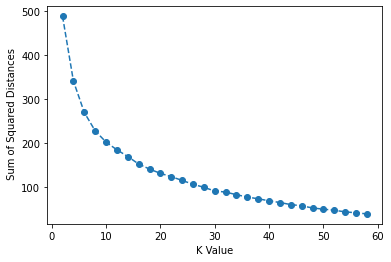

In [66]:
plt.plot(range(2,60,2),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

We can decide number of clusters using the above Figure with elbow method that is selecting the number of K where sharp decrease in SSE occurs. In this case, there is no sharp decrease. Therefore, we can select any appropriate value.

<br><br>

#### 3.2.3. KMeans Clustering

In [67]:
model = KMeans(n_clusters=15, random_state=101)
model.fit(scaled_X)

KMeans(n_clusters=15, random_state=101)

In [68]:
df_bycountry['Clusters'] = model.labels_

/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



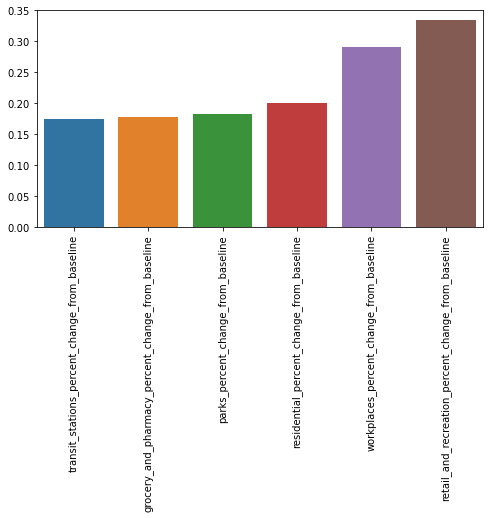

In [69]:
plt.figure(figsize=(8,4))
sns.barplot(df_bycountry.corr()['Clusters'].sort_values().index[:-1], df_bycountry.corr()['Clusters'].sort_values().values[:-1])
plt.xticks(rotation=90);

#### 3.2.4. Map Graph

In [70]:
iso_codes = pd.read_csv("../Traffic Studies/country_iso_codes.csv")

In [71]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [72]:
df_bycountry = df_bycountry.merge(iso_codes, how="left", left_on= "country_region" , right_on="Country")

In [73]:
df_bycountry.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters,Country,ISO Code
0,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,10,Afghanistan,AFG
1,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,5,Angola,AGO
2,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,13,Antigua and Barbuda,ATG
3,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,7,Argentina,ARG
4,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,13,Aruba,ABW


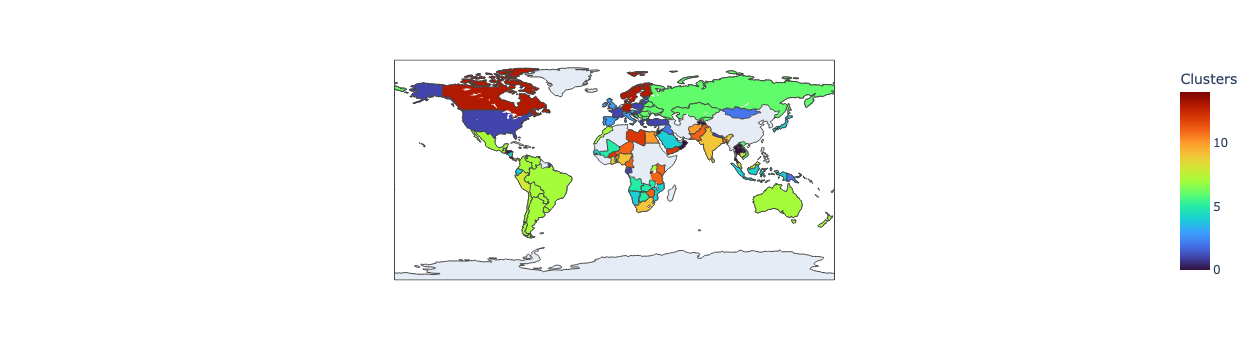

In [92]:
import plotly.express as px

fig = px.choropleth(df_bycountry, locations="ISO Code",
                    color="Clusters", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

<img src='worldmap.png'/>

The above figure shows the world map, in which countries are colored by their clusters. At first look, it seems that neighbor countries shows similar behaviour, such as Asian countries, South American countries, Turkey-Greece. There is no clear sign of development levels affecting mobility behaviour. We can conclude that cultural habits affects the mobility more then development levels. We can create a GDP per capita versus mobility change graph colored by clusters to observe the relationship. The graph confirms that GDP per capita has no significant effect on mobility behaviour.

In [84]:
df_temp = df_bycountry.merge(df.groupby(["country_region"], as_index=False).mean()[["country_region","mean_percent_change", "gdp_per_cap_2020"]],
                   left_on="Country", right_on="country_region", how="left" )

In [85]:
df_temp.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters,Country,ISO Code,country_region,mean_percent_change,gdp_per_cap_2020
0,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,10,Afghanistan,AFG,Afghanistan,19.400426,516.747871
1,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,5,Angola,AGO,Angola,6.903192,1776.166868
2,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,13,Antigua and Barbuda,ATG,Antigua and Barbuda,-16.993265,13992.744480
3,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,7,Argentina,ARG,Argentina,-11.841312,8579.017773
4,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,13,Aruba,ABW,Aruba,-3.991416,NaN


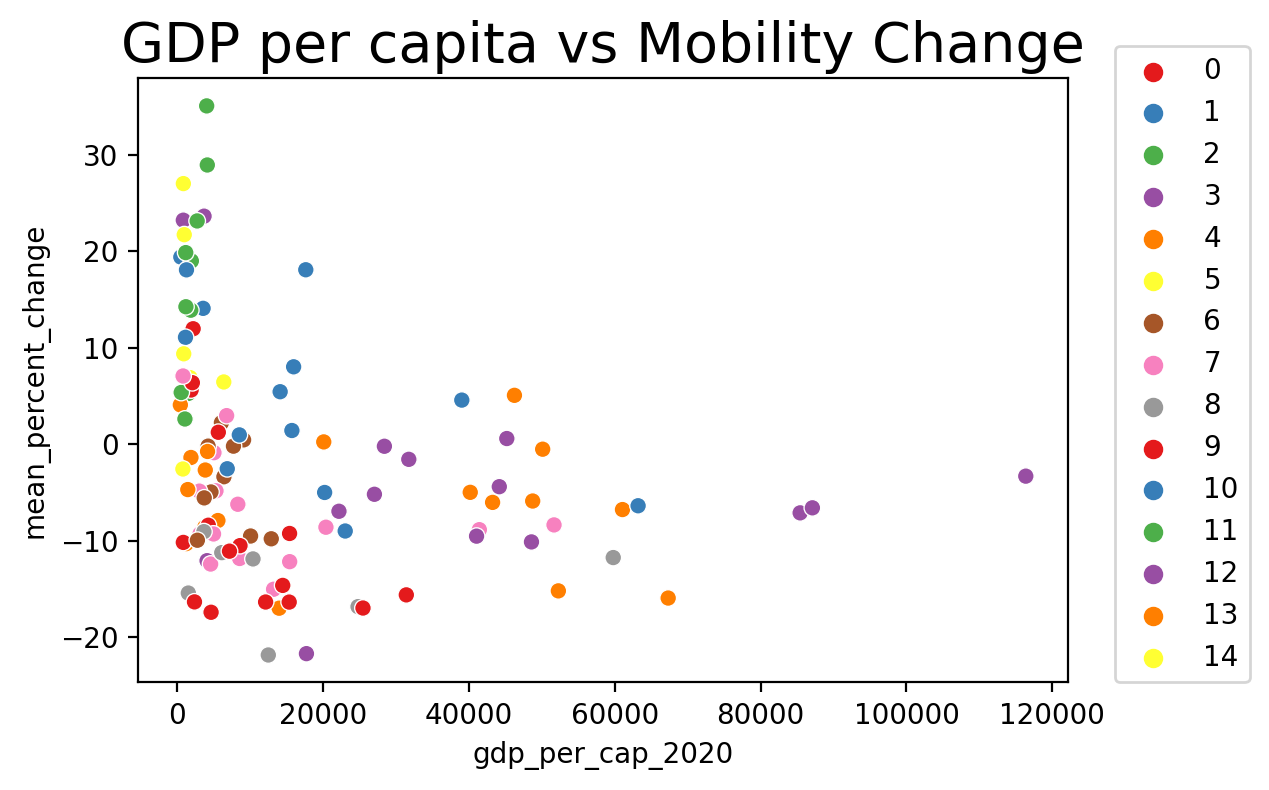

In [88]:
plt.figure(dpi=200)

sns.scatterplot(data=df_temp, x= "gdp_per_cap_2020", y="mean_percent_change", hue="Clusters", palette="Set1")

plt.legend(loc=(1.05,0))
plt.title("GDP per capita vs Mobility Change", fontsize=20);

<br><br><br>

## 4. Conclusion and Discussion

In this work, countries are clustered by their mobility change data during COVID19 pandemy provided by Google. 

The world map, in which countries are colored by their clusters shows that neighbor countries shows similar behaviour, such as Asian countries, South American countries, Turkey-Greece. There is no clear sign of development levels affecting mobility behaviour. We can conclude that cultural habits affects the mobility more then development levels. The GDP per capita versus mobility change graph colored by clusters confirms that GDP per capita has no significant effect on mobility behaviour.

Further studies can be conducted with different methods and focusing on different features. More data from other sources may conduct this research as well. This study is to gain an insight of the data only. 

The same dataframe is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb

<br>

##### 3.1.1. Correlation Matrix

Since the data is checked in the previous work, we can start with a simple correlation analysis.

<AxesSubplot:>

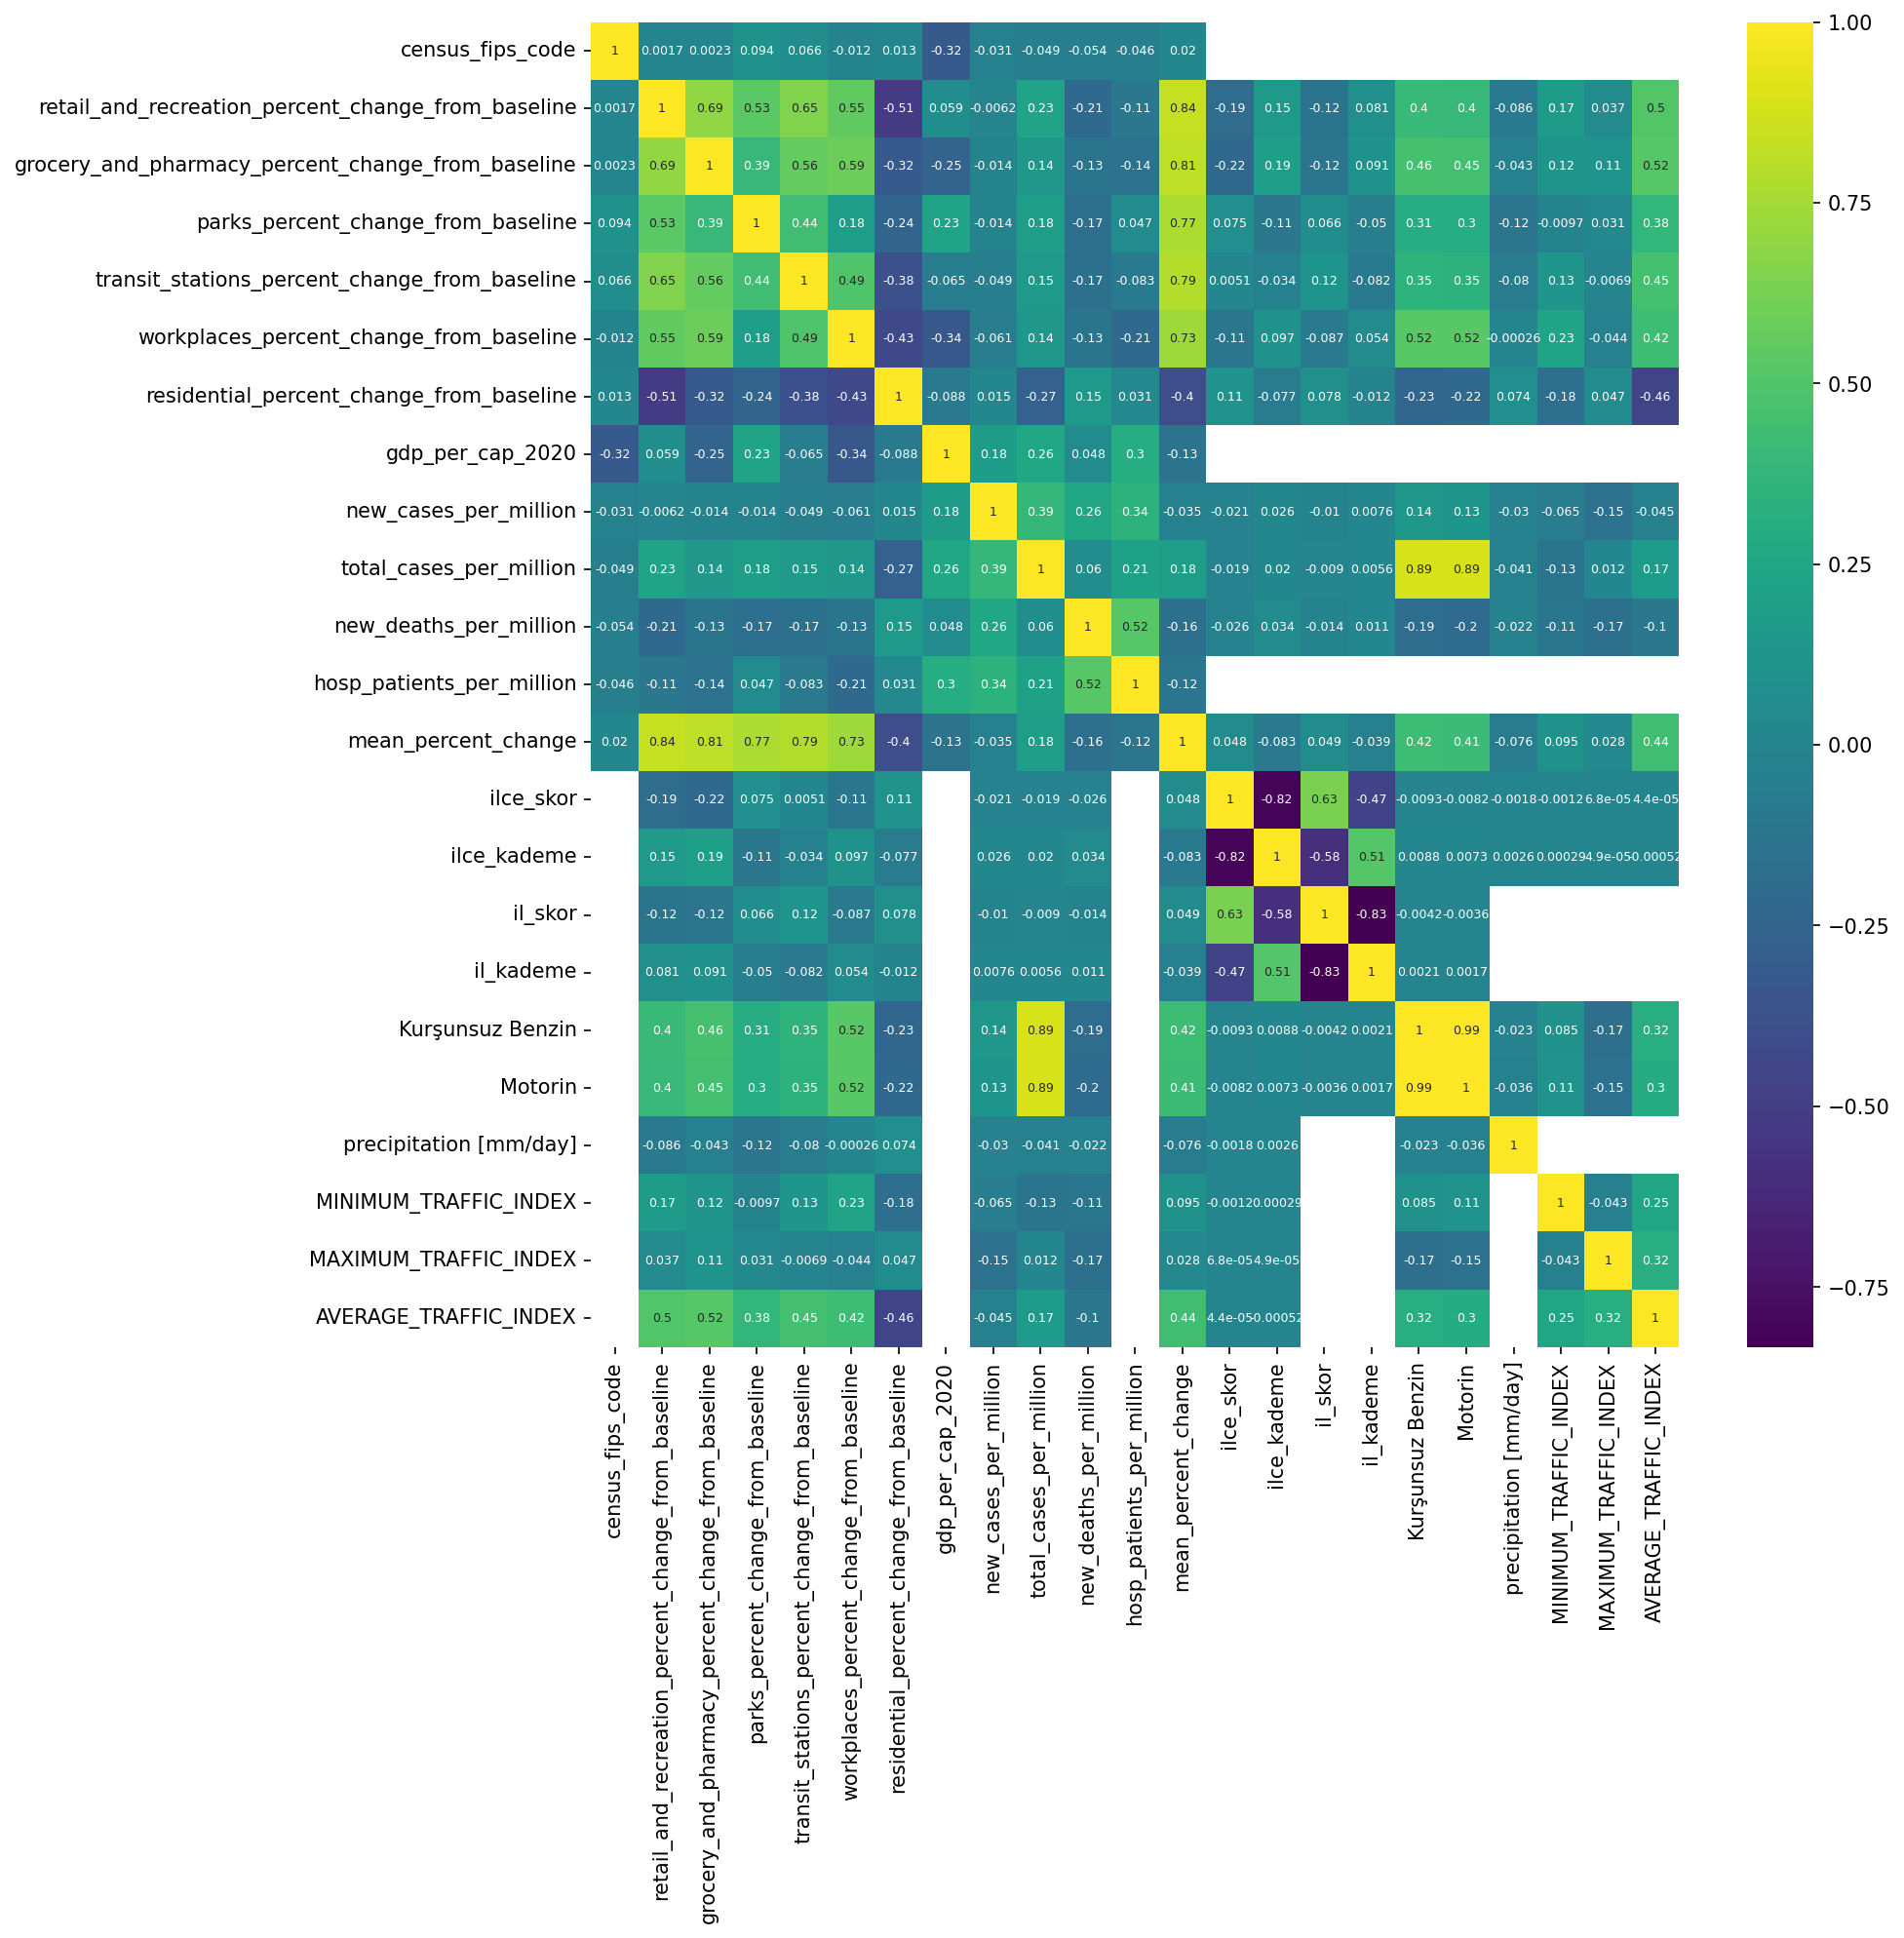

In [17]:
plt.figure(figsize=(12,12),dpi=150)
sns.heatmap(df.corr(),cmap="viridis", annot=True, annot_kws={"fontsize": 6})

To be able to investigate the relationship between mobility change and other variables, we can begin with focusing on mean of the mobility change values, e.g. "mean_percent_change". We can draw these results:

<ul>
<li>Mean mobility change looks negatively correlated with gdp per capita but correlation value (-0.13) is too low to satisfy power of the relationship.&nbsp;</li>
<li>There is also no strong relationship between the mean mobility change and COVID19 records, e.g. cases, deaths, etc.</li>
<li>The relationship between development index values, e.g., il_kademe and ilce_kademe, is almost none.</li>
<li>At the first look, there can be seen a relatively strong relationship between fuel price (Kursunsuz_benzin) and the mean mobility change, however, we expect that increasing prices would negatively affect the mobility yet the correlation shows positive relationship. We can concluded that this relationship is a coincidence.</li>
<li>Weather plays a significant role on mobility as we know, however, precipitation amount has very low correlation with the mean mobility change.</li>
<li>The mean mobility change is highly correlated with average traffic congestion index. On the other hand, it has very low correlation with maximum and minimum traffic congestion index. In other words, average traffic during a day is affected by the pandemy, whereas, peak traffic hours did not affected.</li>
</ul>

<b>Important Note: </b>Please note that we cannot conclude the relationships by only examining the correlation matrix. These are the average values and the graphs should be analyzed carefully.

<br>

##### 3.1.2. Outlier Countries 

Let's group the countries together and find the outlier countries.

In [19]:
df_bycountry = df.groupby("country_region").mean()

In [20]:
df_bycountry.head()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,gdp_per_cap_2020,new_cases_per_million,total_cases_per_million,...,ilce_skor,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
country_region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,516.747871,4.811977,2396.956599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,1776.166868,3.789821,1066.454431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,13992.744480,105.242824,22136.455863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,8579.017773,242.217742,81270.644198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aruba,NaN,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,NaN,438.625654,119654.571796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'gdp_per_cap_2020',
       'continent', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'hosp_patients_per_million',
       'mean_percent_change', 'il', 'ilce', 'ilce_skor', 'ilce_kademe',
       'il_skor', 'il_kademe', 'Kurşunsuz Benzin', 'Motorin',
       'precipitation [mm/day]', 'rain', 'MINIMUM_TRAFFIC_INDEX',
       'MAXIMUM_TRAFFIC_INDEX', 'AVERAGE_TRAFFIC_INDEX'],
      dtype='object')

In [22]:
mobility_cols = ['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline',
                 'mean_percent_change']

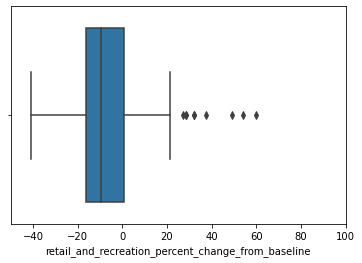

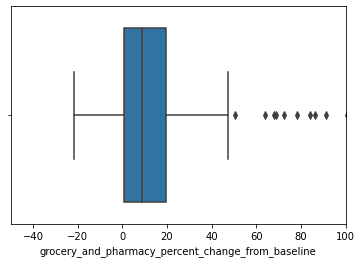

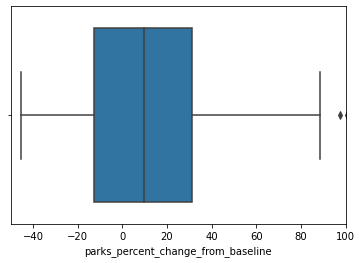

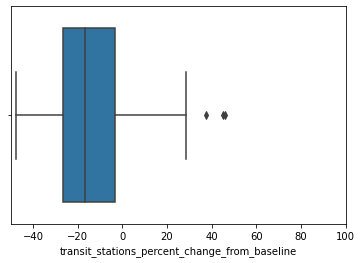

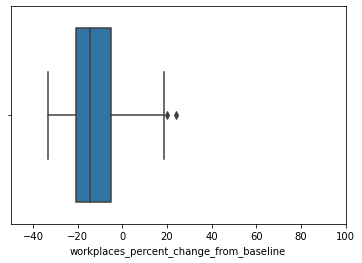

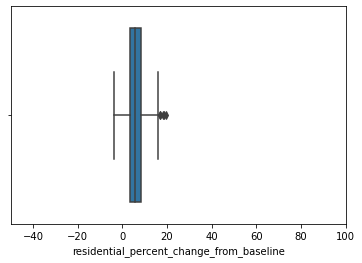

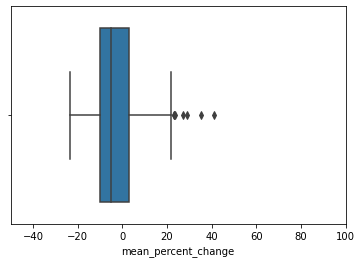

In [23]:
for i in mobility_cols:
    sns.boxplot(data = df_bycountry, x= df_bycountry[i])
    plt.xlim(-50,100)
    plt.show()

In [24]:
def get_outliers(data, col_num):
    q75,q25 = data.iloc[:,col_num].quantile([0.75,0.25])
    q50 = data.iloc[:,col_num].mean()
    iqr = q75-q25
    return data[(data.iloc[:,col_num]>q50+(1.5*iqr)) | (data.iloc[:,col_num]<q50-(1.5*iqr))]

In [26]:
get_outliers(df_bycountry,1)

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,gdp_per_cap_2020,new_cases_per_million,total_cases_per_million,...,ilce_skor,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
country_region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,516.747871,4.811977,2396.956599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burkina Faso,NaN,37.483101,86.339689,72.696884,24.207355,10.276631,3.243413,857.932730,1.196247,463.581432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iraq,NaN,31.949192,84.213626,24.024249,26.510393,4.446882,2.503464,4145.862936,65.782557,27711.289152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Libya,NaN,59.693382,100.651521,97.380886,11.814743,13.147636,-0.585791,3699.294765,86.087236,28342.832324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liechtenstein,NaN,-34.123711,-1.306122,NaN,-19.107098,-22.003339,NaN,NaN,543.339728,112368.772085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mongolia,NaN,31.921209,91.384661,41.110054,46.211894,18.489185,3.784065,4060.950518,315.717486,80488.118936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Myanmar (Burma),NaN,-41.087375,-21.852194,-23.964244,-40.656878,-33.149731,18.865281,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Niger,NaN,49.179548,18.688776,30.801858,45.094385,-5.718323,1.184200,567.669892,0.445762,175.367173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panama,NaN,-32.362009,-11.052540,-45.326790,-32.984988,-25.413972,16.083141,12509.835290,242.390801,80951.767957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
for i in range(1,7):
    print(df_bycountry.columns[i])
    print(get_outliers(df_bycountry,i).index,"\n")

retail_and_recreation_percent_change_from_baseline
Index(['Afghanistan', 'Burkina Faso', 'Iraq', 'Libya', 'Liechtenstein',
       'Mongolia', 'Myanmar (Burma)', 'Niger', 'Panama', 'Papua New Guinea',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country_region') 

grocery_and_pharmacy_percent_change_from_baseline
Index(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Côte d'Ivoire',
       'Egypt', 'Iraq', 'Kuwait', 'Libya', 'Mongolia', 'Myanmar (Burma)',
       'Papua New Guinea', 'Réunion', 'Yemen'],
      dtype='object', name='country_region') 

parks_percent_change_from_baseline
Index(['Greece', 'Libya', 'Mali', 'Togo'], dtype='object', name='country_region') 

transit_stations_percent_change_from_baseline
Index(['Burkina Faso', 'Cameroon', 'Iraq', 'Kazakhstan', 'Mongolia', 'Niger',
       'Papua New Guinea', 'Yemen'],
      dtype='object', name='country_region') 

workplaces_percent_change_from_baseline
Index(['Kenya', 'Libya', 'Mongolia', 'Papua New Guin

It seems that the outlier countries are mostly the same countries for each mobility change values. The common characteristics of these countries maybe ongoing wars, conflicts and low development. <br><br>

##### 3.1.3. Sample Country Analysis: Turkey Case Study

We can focus on one country in order to eliminate differences in countries because of different pandemy conditions at certain times. Since my best knowledge is where I live, Turkey is selected for further analysis. We can begin by filtering.

In [34]:
df_tr = df[df["country_region_code"] == "TR"]

In [35]:
df_tr.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,...,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],rain,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
7555605,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,...,NaN,NaN,NaN,6.66,6.37,NaN,NaN,NaN,NaN,NaN
7555606,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,...,NaN,NaN,NaN,6.66,6.37,NaN,NaN,NaN,NaN,NaN
7555607,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,...,NaN,NaN,NaN,6.66,6.37,NaN,NaN,NaN,NaN,NaN
7555608,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,...,NaN,NaN,NaN,6.66,6.37,NaN,NaN,NaN,NaN,NaN
7555609,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,...,NaN,NaN,NaN,6.66,6.37,NaN,NaN,NaN,NaN,NaN


<br><br>At first we do not want to focus on sub regions. So, we can group them.

In [36]:
df_tr_bydate = df_tr.groupby(["date"], as_index=False).mean()

In [47]:
df_tr_bydate.head()

,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,gdp_per_cap_2020,new_cases_per_million,...,ilce_skor,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
0,2020-02-15,NaN,3.225714,4.027701,-6.611570,-11.630872,6.860294,1.150171,8536.43332,0.0,...,0.807410,2.420779,0.894361,2.571429,6.66,6.37,11.4,6.0,255.0,31.0
1,2020-02-16,NaN,6.792398,6.862687,7.387534,-3.076389,5.295455,0.576923,8536.43332,0.0,...,0.844745,2.387363,0.922901,2.557692,6.66,6.37,0.0,4.0,255.0,21.0
2,2020-02-17,NaN,5.788344,6.247283,8.517572,-2.501706,9.536957,-1.292537,8536.43332,0.0,...,0.764714,2.459259,0.836936,2.654321,6.66,6.37,0.0,4.0,63.0,30.0
3,2020-02-18,NaN,5.785933,6.059783,11.083871,-2.519164,10.212254,-1.875740,8536.43332,0.0,...,0.772274,2.450249,0.845420,2.636816,6.66,6.37,0.0,6.0,255.0,32.0
4,2020-02-19,NaN,1.306991,2.152174,6.457944,-5.498270,10.248352,-1.709581,8536.43332,0.0,...,0.772417,2.446650,0.848072,2.630273,6.66,6.37,0.0,6.0,255.0,32.0


In [58]:
df_tr_bydate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                866 non-null    object 
 1   census_fips_code                                    0 non-null      float64
 2   retail_and_recreation_percent_change_from_baseline  866 non-null    float64
 3   grocery_and_pharmacy_percent_change_from_baseline   866 non-null    float64
 4   parks_percent_change_from_baseline                  866 non-null    float64
 5   transit_stations_percent_change_from_baseline       866 non-null    float64
 6   workplaces_percent_change_from_baseline             866 non-null    float64
 7   residential_percent_change_from_baseline            866 non-null    float64
 8   gdp_per_cap_2020                                    866 non-null    float64
 9  

In [59]:
df_tr_bydate["date"] = pd.DatetimeIndex(df_tr_bydate["date"])

<br><br>We should also consider the weekend effects. So we add a column to see if the day is weekend or weekday.

In [60]:
df_tr_bydate["weekend"] = df_tr_bydate["date"].dt.weekday.apply(lambda x: 1 if x >4 else 0)
df_tr_bydate["weekend"] = df_tr_bydate["weekend"].astype("category")

Then we can start visualization.

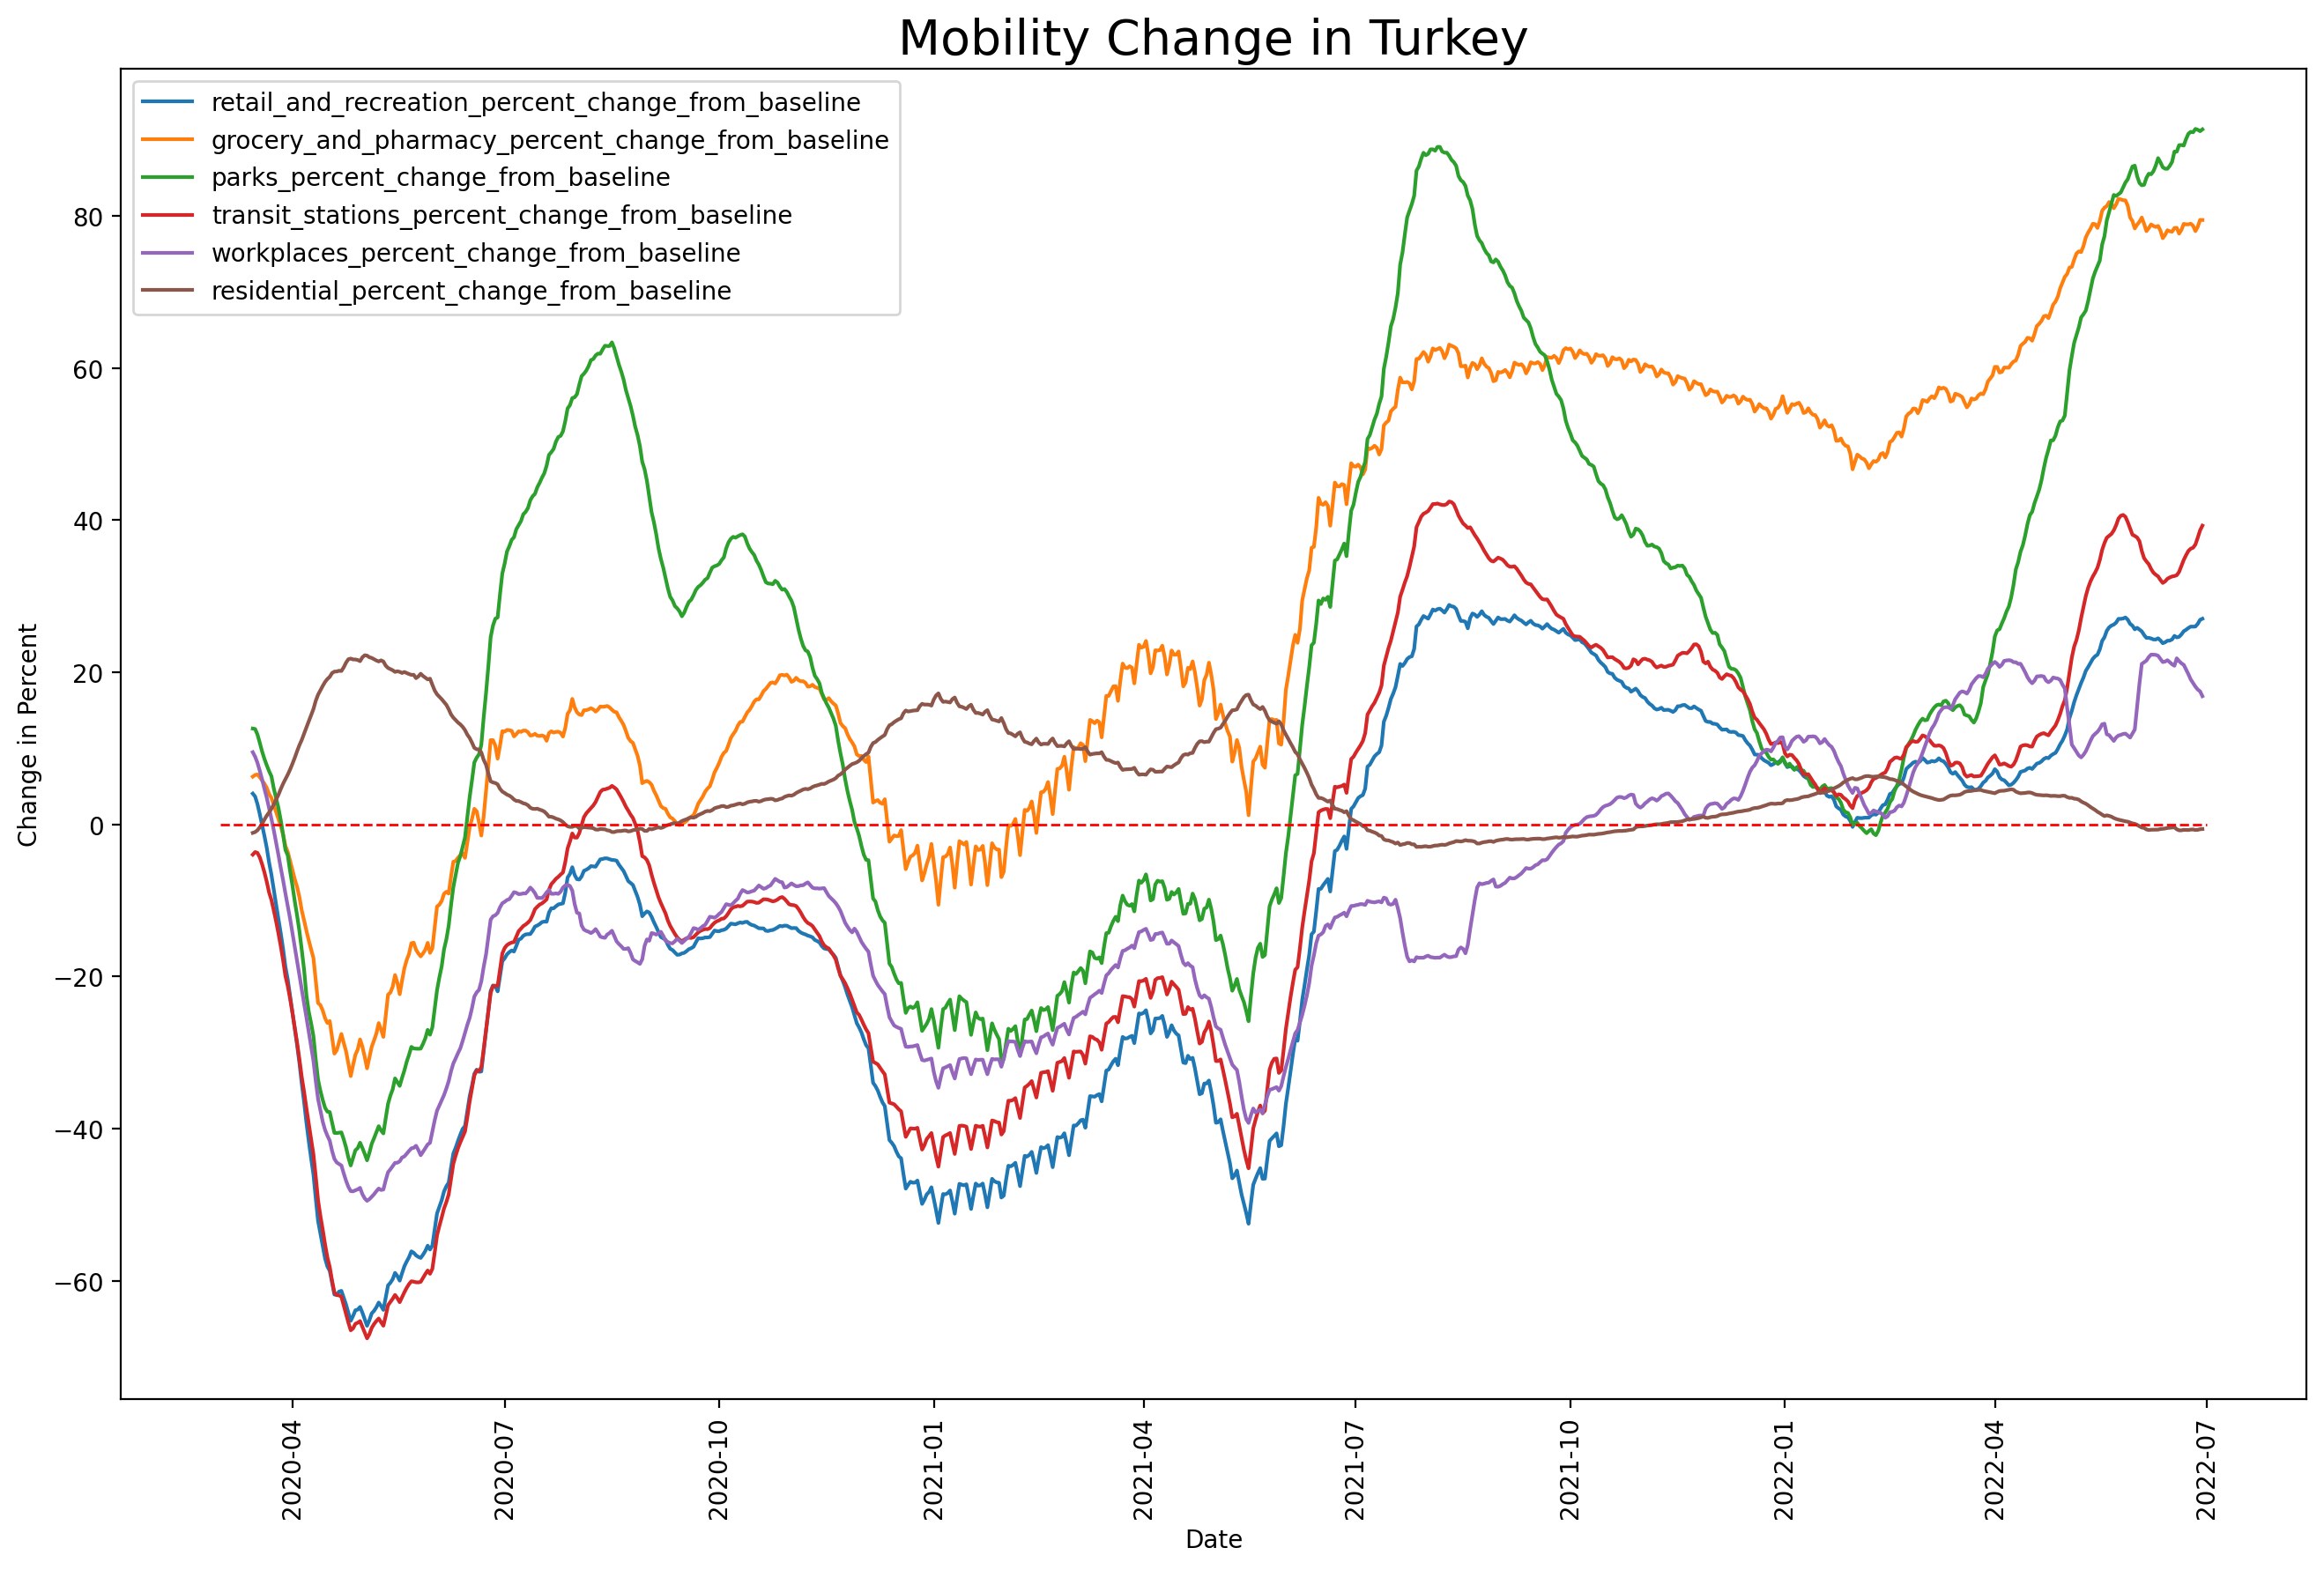

In [75]:
plt.figure(figsize=(16,10),dpi=200)

sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[0]].rolling( 30).mean(), label=mobility_cols[0])
sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[1]].rolling( 30).mean(), label=mobility_cols[1])
sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[2]].rolling( 30).mean(), label=mobility_cols[2])
sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[3]].rolling( 30).mean(), label=mobility_cols[3])
sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[4]].rolling( 30).mean(), label=mobility_cols[4])
sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[5]].rolling( 30).mean(), label=mobility_cols[5])
#sns.lineplot(data=df_tr_bydate, x="date", y=df_tr_bydate[mobility_cols[6]].rolling( 30).mean(), label=mobility_cols[6],ls="--",linewidth=8)


plt.hlines(0,pd.to_datetime("2020-03"),pd.to_datetime("2022-07"),color="r",linestyles="--",linewidth=1)

plt.xlabel("Date")
plt.ylabel("Change in Percent")

plt.xticks( rotation=90)

plt.legend()
plt.title("Mobility Change in Turkey", fontsize=20);


We can add year, month and day columns for ease of creating graphs.

In [85]:
df_tr_bydate["year"] = df_tr_bydate["date"].apply(lambda x: x.year)
df_tr_bydate["month"] = df_tr_bydate["date"].apply(lambda x: x.month)
df_tr_bydate["day"] = df_tr_bydate["date"].apply(lambda x: x.day)

In [87]:
df_tr_bydate["week_day"] = df_tr_bydate["date"].dt.weekday

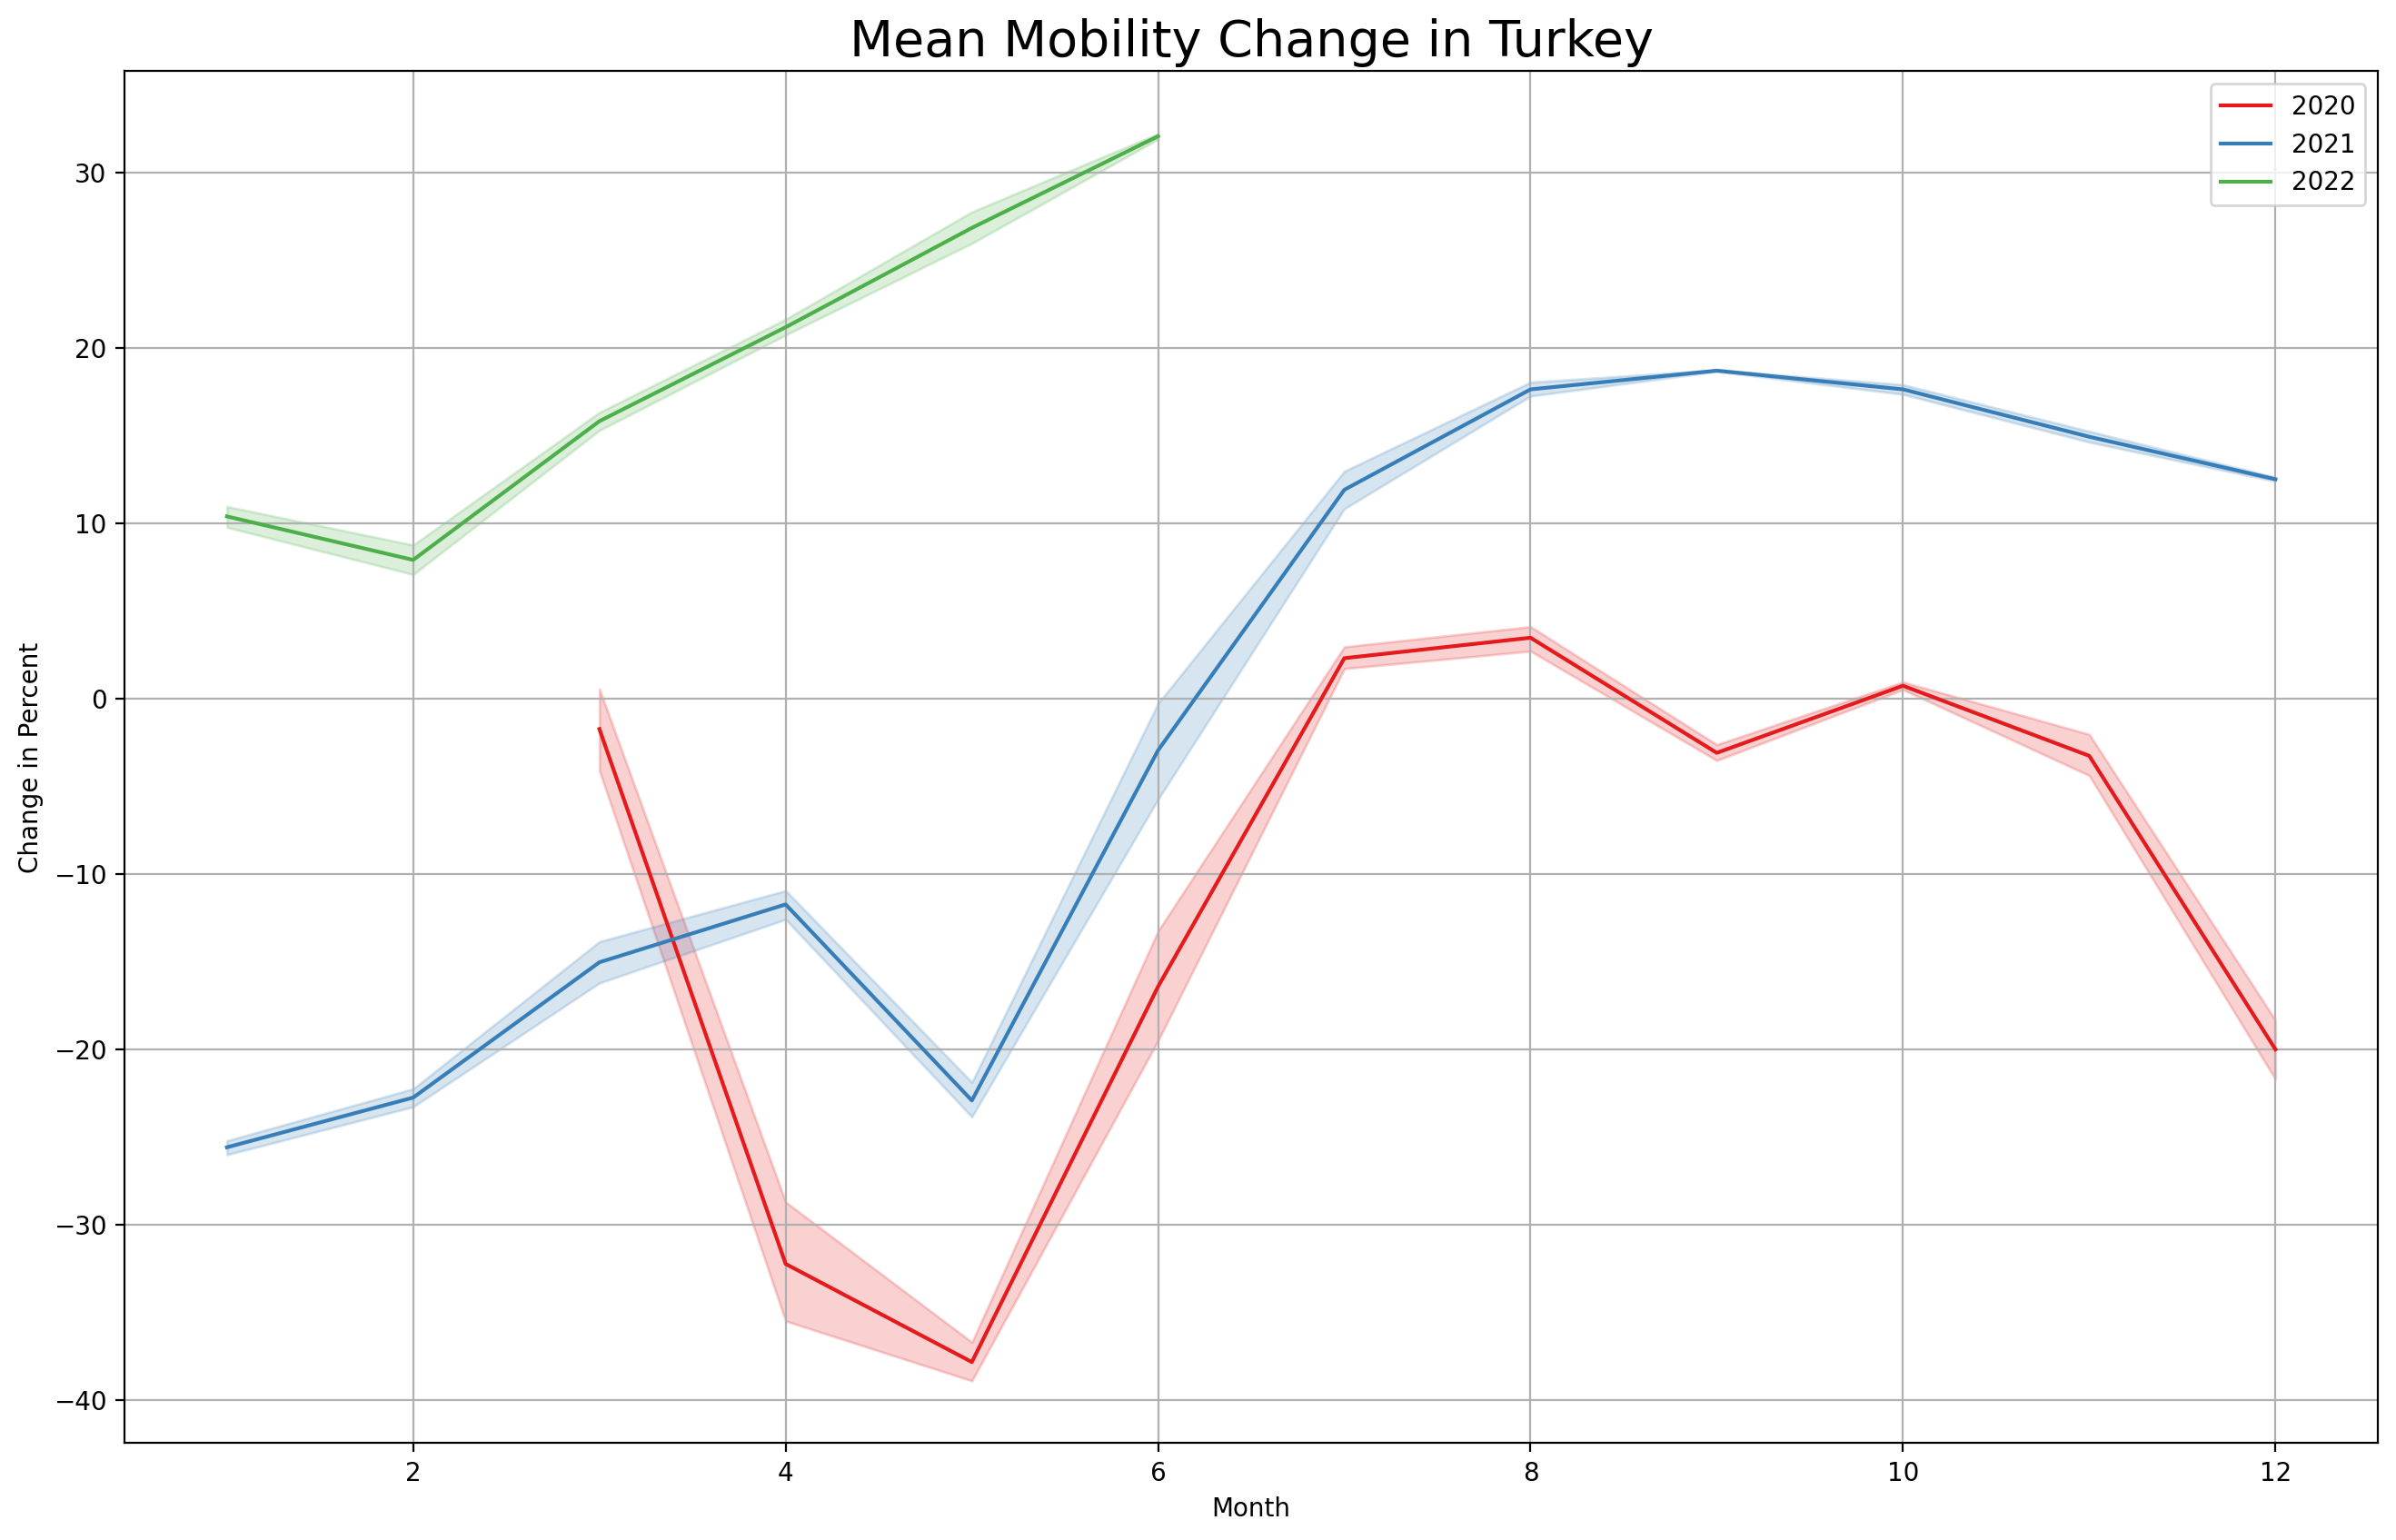

In [86]:
plt.figure(figsize=(16,10),dpi=200)

sns.lineplot(data=df_tr_bydate, x="month", y=df_tr_bydate["mean_percent_change"].rolling( 30).mean(), hue="year", palette="Set1")

plt.grid()

plt.xlabel("Month")
plt.ylabel("Change in Percent")

plt.legend()
plt.title("Mean Mobility Change in Turkey", fontsize=20);


<br><br>As seen in the above figure, there is a significant decline in mobility in 2020 and 2021, whereas, in 2022 the mobility increased to a level that is even more than before pandemy period. Let's focus on 2020 and include only weekdays.

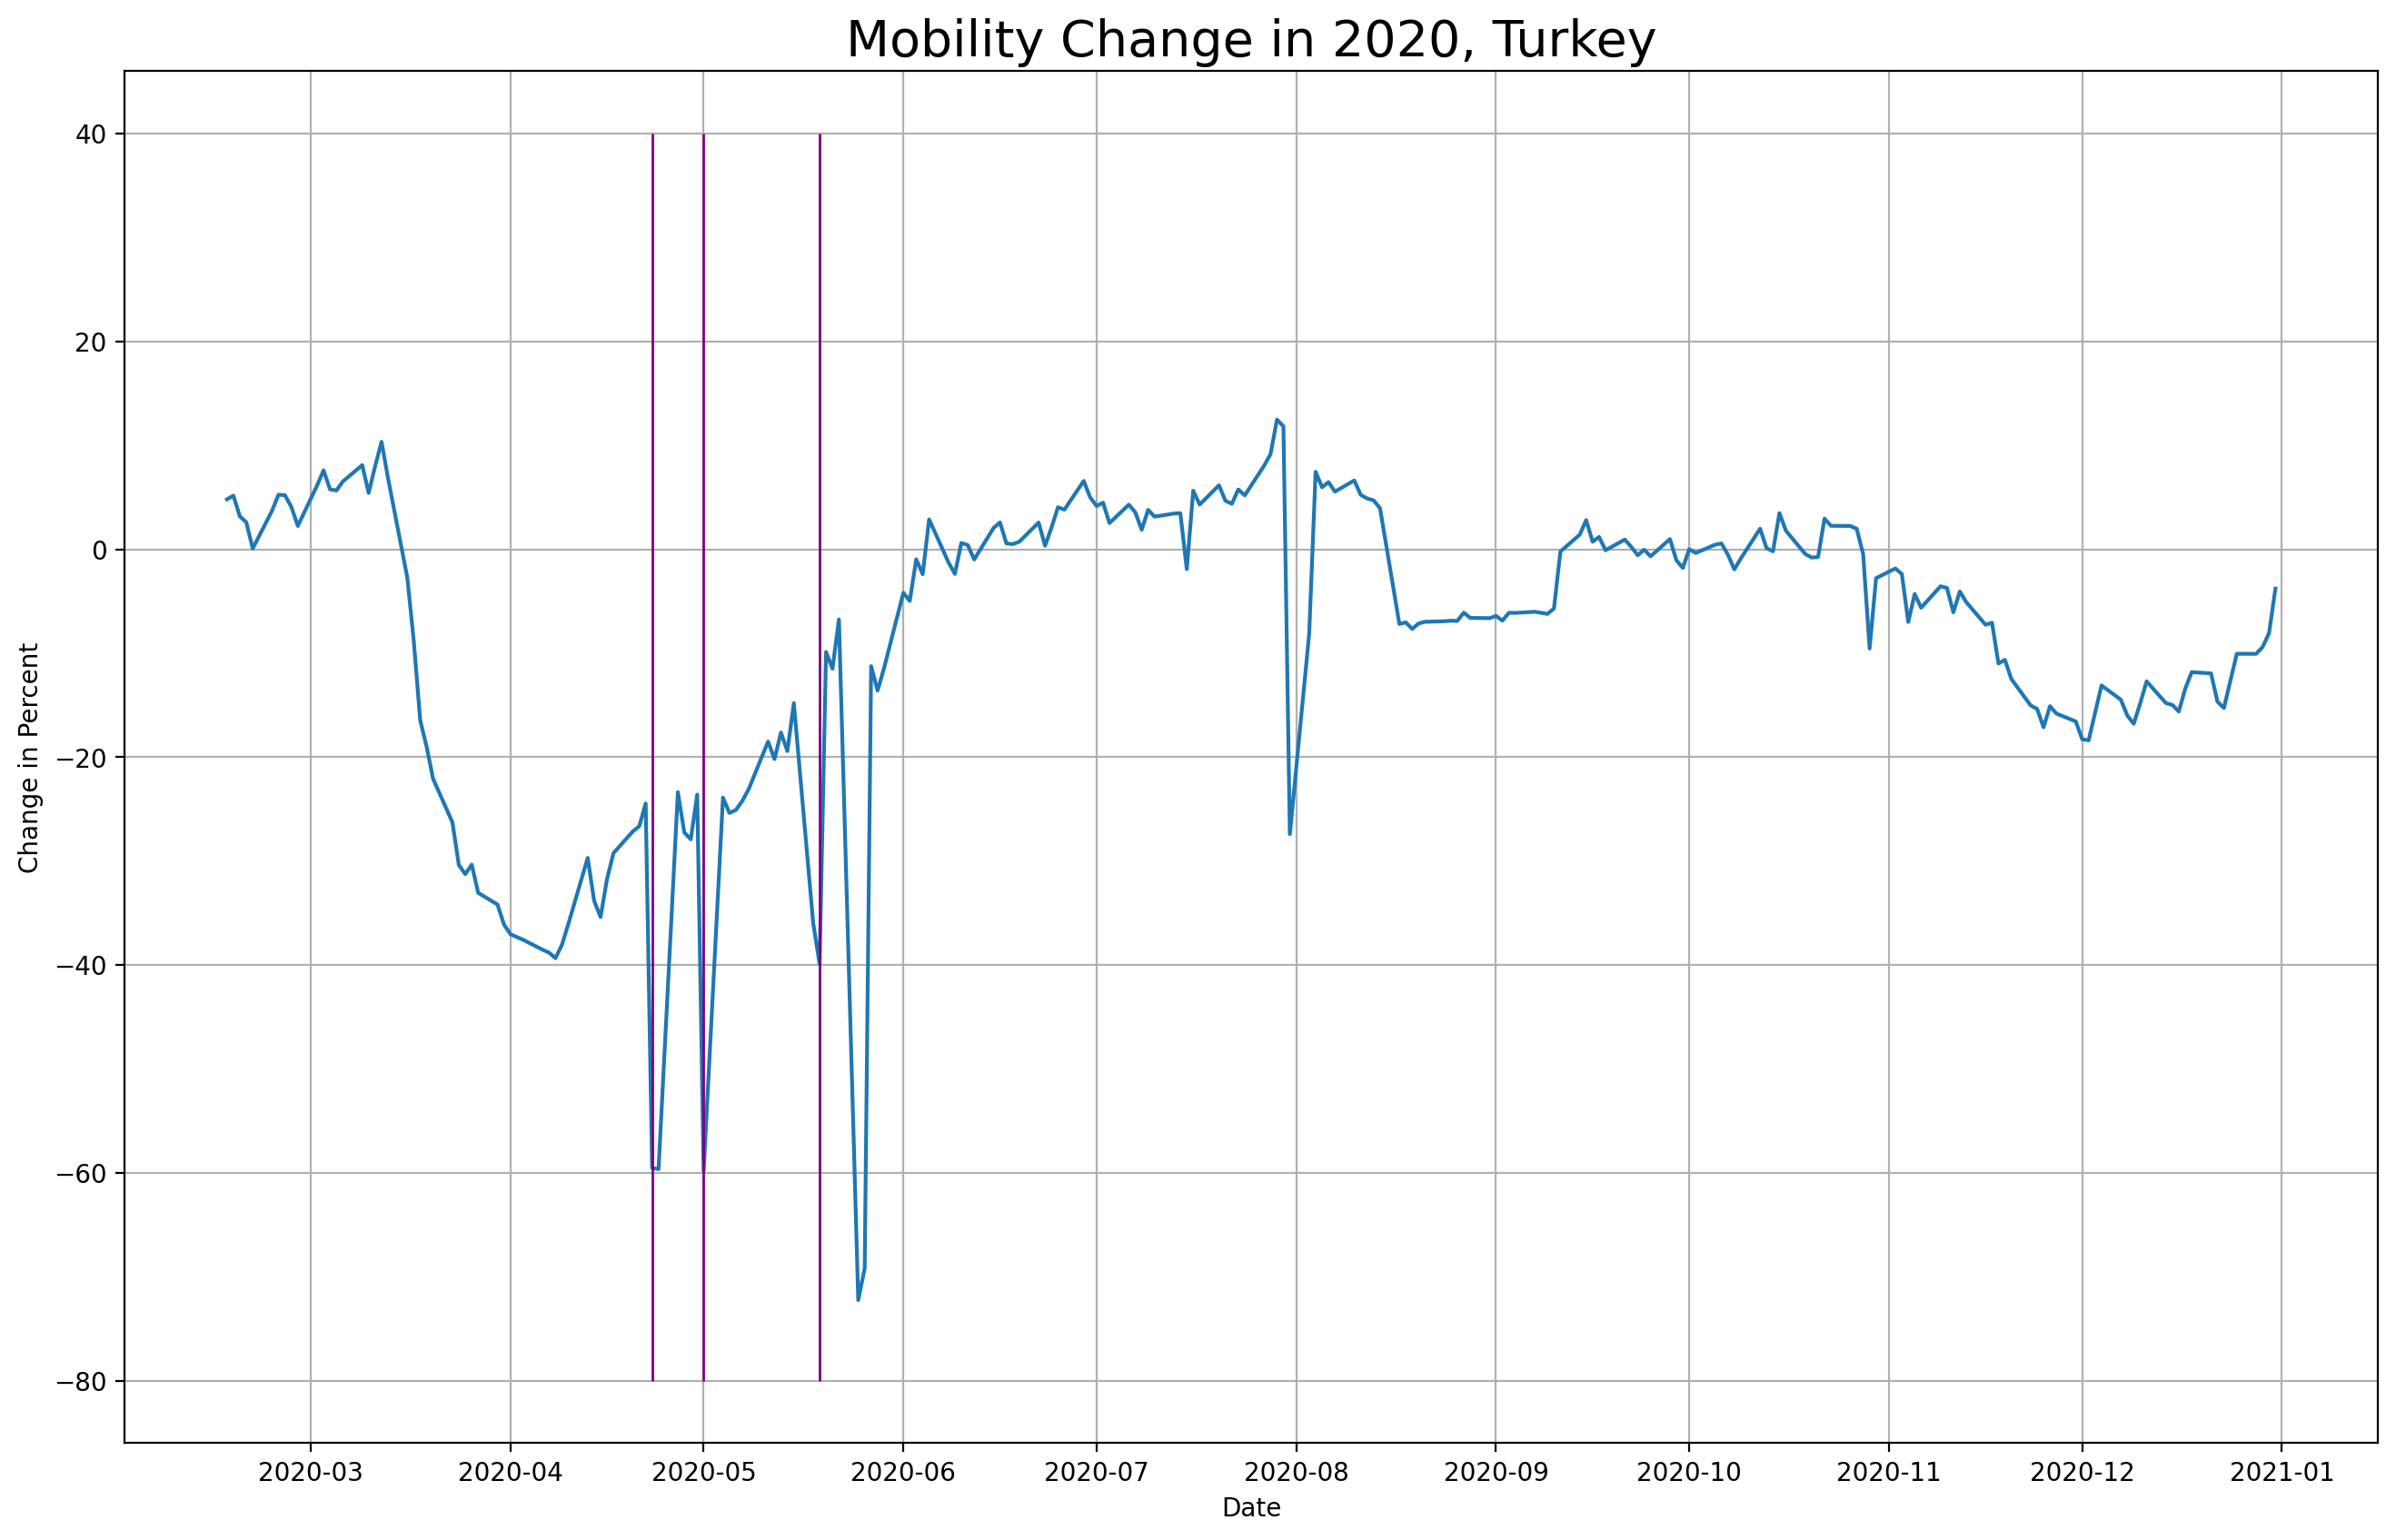

In [90]:
plt.figure(figsize=(16,10),dpi=200)

sns.lineplot(data=df_tr_bydate, x="date", 
             y=df_tr_bydate[(df_tr_bydate["weekend"]==0) & (df_tr_bydate["year"]==2020)]["mean_percent_change"], 
             palette="Set1")

plt.grid()

# Marking Some National Holidays
plt.vlines(x = pd.to_datetime("2020-04-23"), ymin=-80,ymax=40, linewidth=1, colors="purple")
plt.vlines(x = pd.to_datetime("2020-05-01"), ymin=-80,ymax=40, linewidth=1, colors="purple")
plt.vlines(x = pd.to_datetime("2020-05-19"), ymin=-80,ymax=40, linewidth=1, colors="purple")



plt.xlabel("Date")
plt.ylabel("Change in Percent")

plt.title("Mobility Change in 2020, Turkey", fontsize=20);


In the figure, it can be seen that the decline started between March and April 2020, when Turkish Govenrment begin announcing pandemy restrictions. Mobility declined dramatically, especially on National holidays.<br><br>

##### 3.1.3. City Analysis: Turkey Case Study

Now we can start focusing on cities with grouping.

In [92]:
df_tr_temp = df[df["country_region"] == "Turkey"].groupby("sub_region_1", as_index=False).mean()

In [93]:
df_tr_temp

,sub_region_1,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,gdp_per_cap_2020,new_cases_per_million,...,ilce_skor,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
0,Adana,NaN,-5.769986,25.359170,16.100017,-19.399955,-4.973540,4.415071,8536.43332,195.068454,...,0.713818,2.421271,0.353,3.0,9.674152,9.579613,NaN,NaN,NaN,NaN
1,Adıyaman,NaN,-2.815836,27.729890,22.738589,-24.194805,-6.449038,7.637828,8536.43332,200.467655,...,-0.129074,3.493188,-0.926,6.0,9.739127,9.647227,NaN,NaN,NaN,NaN
2,Afyonkarahisar,NaN,-13.573064,29.337440,51.735455,-0.840571,-10.126878,3.304539,8536.43332,207.582375,...,-0.074294,3.502052,-0.023,4.0,9.856488,9.765861,NaN,NaN,NaN,NaN
3,Aksaray,NaN,12.859691,32.867420,7.384661,-36.681845,-2.460044,2.312209,8536.43332,204.133831,...,0.508847,2.769886,-0.271,4.0,9.714085,9.602687,NaN,NaN,NaN,NaN
4,Amasya,NaN,-11.842001,28.618121,15.109821,-23.325170,-10.777863,4.209588,8536.43332,202.591399,...,0.168554,2.857207,0.054,4.0,9.756455,9.659340,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Çorum,NaN,-9.607227,22.849762,9.394908,-20.565773,-12.393960,3.912616,8536.43332,207.682251,...,-0.069941,3.742804,-0.262,4.0,9.828270,9.735991,NaN,NaN,NaN,NaN
77,İstanbul,NaN,-21.390388,20.264315,26.063911,7.077524,-15.484814,6.981054,8536.43332,194.599567,...,2.489259,1.256441,4.051,1.0,9.662296,9.566173,NaN,2.819844,137.955625,28.232846
78,İzmir,NaN,-11.153109,28.545930,12.567895,-6.864690,-8.163179,5.358164,8536.43332,197.594277,...,1.283125,1.888419,1.926,1.0,9.683198,9.585015,NaN,NaN,NaN,NaN
79,Şanlıurfa,NaN,1.278967,69.967624,-1.664795,-0.094183,7.065556,7.890494,8536.43332,200.794308,...,-0.561167,4.718657,-1.350,6.0,9.736833,9.641103,NaN,NaN,NaN,NaN


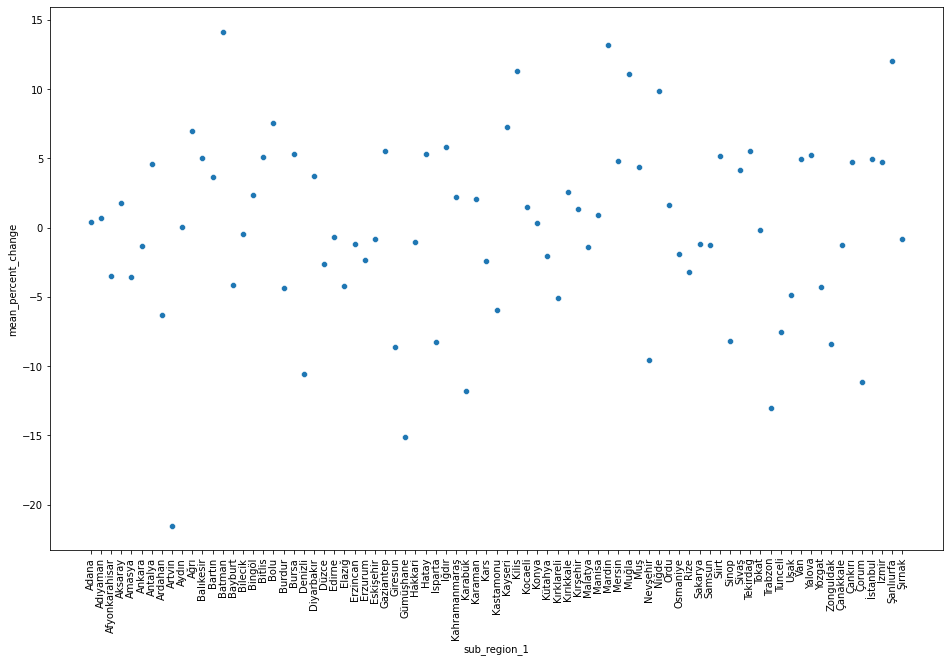

In [94]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df_tr_temp, x="sub_region_1", y="mean_percent_change")
plt.xticks(rotation=90);

The figure shows there is a significant fluctuations between cities and it seems randomly dispersed. We focus on this situations more when we examine development index.

<br><br><br>

<br><br><br>